In [114]:
from logistic_regression import *
%matplotlib inline

In [119]:
# データ生成
# クラス数
maxcls = 2
# 総データ数
N = 200
# 外れ値データ数
out_N = 10
# 各クラスのデータの平均・分散
mean_1 = np.array([0, -4])
mean_2 = np.array([0, 8])
cov = np.array([[10, 7], [7, 10]])
# Dataクラスを用いてデータをN個生成
data_1 = Data(mean=mean_1, cov=cov, N=int(N/2), cls=0, maxcls=maxcls)
data_2 = Data(mean=mean_2, cov=cov, N=int(N/2), cls=1, maxcls=maxcls)
# クラス2に属する外れ値を意図的に生成
N += out_N
data_out = Data(mean=np.array([-10, 30]), cov=cov, N=out_N, cls=1, maxcls=maxcls)
data_2.x_vec = np.vstack((data_2.x_vec, data_out.x_vec))

In [120]:
# feature degree
feature_d = 3
# initialize weights (shape: maxcls * 1)
w = np.zeros((feature_d, 1))

# non-linear convert
data_1.phi_vec = np.empty((0, feature_d))
data_2.phi_vec = np.empty((0, feature_d))
for i, data in enumerate(data_1.x_vec):
    data_1.phi_vec = np.append(data_1.phi_vec, convertFeatureVector(data), axis=0)
for i, data in enumerate(data_2.x_vec):
    data_2.phi_vec = np.append(data_2.phi_vec, convertFeatureVector(data), axis=0)

# design matrix
design_phi = np.vstack((data_1.phi_vec, data_2.phi_vec))

In [121]:
# calc class vector (t)
# TODO: refactoring
t_vec = np.empty((0, 1))
for _ in range(data_1.N):
    t_vec = np.append(t_vec, [[data_1.cls]], axis=0)
for _ in range(data_2.N+out_N):
    t_vec = np.append(t_vec, [[data_2.cls]], axis=0)

0
[[-0.51021226]
 [ 0.00524775]
 [ 0.17841377]]


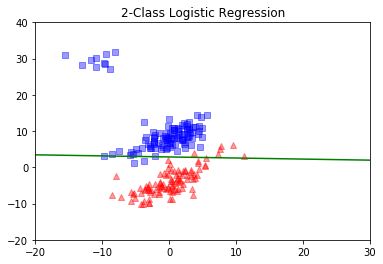

1
[[-0.88662165]
 [-0.18917594]
 [ 0.37272642]]


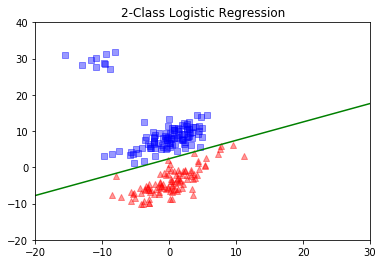

2
[[-1.33899892]
 [-0.34552139]
 [ 0.57384761]]


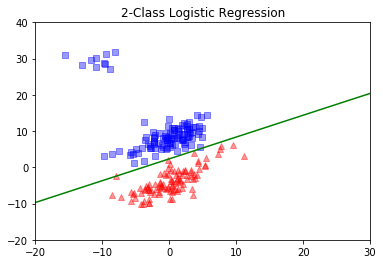

3
[[-1.91464254]
 [-0.49127737]
 [ 0.79836782]]


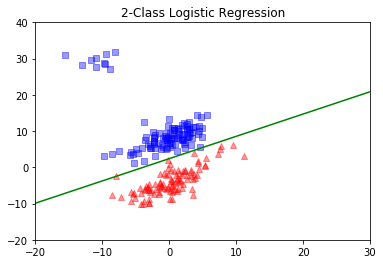

4
[[-2.73297826]
 [-0.63438405]
 [ 1.07524887]]


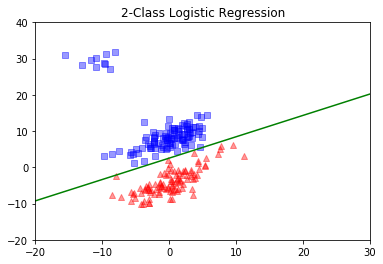

5
[[-3.94774251]
 [-0.81445282]
 [ 1.463829  ]]


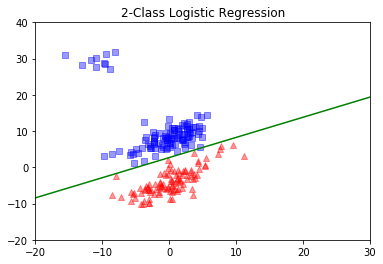

6
[[-5.70801913]
 [-1.09738852]
 [ 2.0535889 ]]


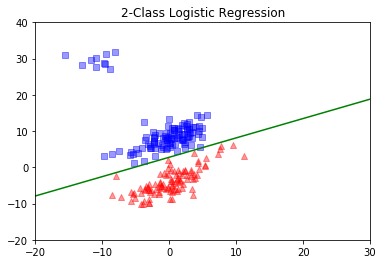

7
[[-8.24933325]
 [-1.53253238]
 [ 2.94655918]]


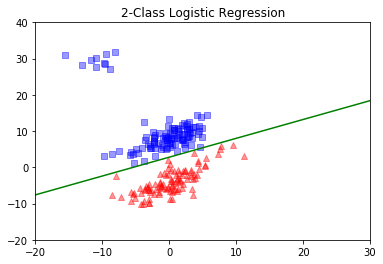

8
[[-11.68560283]
 [ -2.12193565]
 [  4.17211966]]


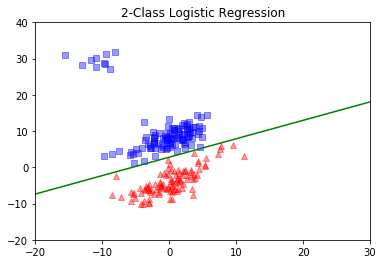

9
[[-15.93757447]
 [ -2.83518815]
 [  5.68062104]]


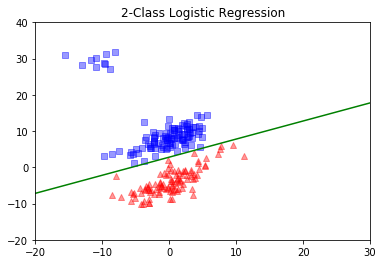

In [122]:
for _ in range(10):
    # calc y_vec, R (4.98)
    R = np.zeros((N, N))
    y_vec = np.empty((0, 1))
    for i, phi in enumerate(design_phi):
        R[i, i] = sigmoid(np.dot(w.T, phi)) * (1 - sigmoid(np.dot(w.T, phi)))
        y_vec = np.append(y_vec, [sigmoid(np.dot(w.T, phi))], axis=0)

    # update weights (4.99)
    H = np.dot(np.dot(design_phi.T, R), design_phi)
    w = w - np.dot(np.linalg.inv(H), np.dot(design_phi.T, (y_vec-t_vec)))
    print(_)
    print(w)

    # plot boundary
    plotW(w)
    
    # plot data
    data_1.scatter('red', '^')
    data_2.scatter('blue', 's')
    data_out.scatter('blue', 's')
    plt.xlim((-20, 30))
    plt.ylim((-20, 40))
    plt.title('2-Class Logistic Regression')
    
    # data_out.scatter('blue', 's')
    plt.show()